# Root Finding: Bracket Hunting Routine

Root finding methods always start with some sort of initial guess. Often this takes the form of an initial interval which is known to "bracket" some root. Bracketing here is taken to specifically mean that the function on opposite sides of the root has opposite signs. That is, the root is a simple root, as opposed to a minimum or maximum.

A simple way to search for bracketed roots is to perform an initial search over the given interval for sign changes. We can make this probe as fancy as we like. Here we just take a brute force approach: divide the interval into $N$ evenly spaced subintervals, and then test each subinterval for a sign change. The routine returns a list of potential bracketed roots. 

This routine may be used as part of a more refined root finding package, either to save computational effort, or to identify potential problem areas.

In [6]:
# set graphics backend
%matplotlib notebook

In [7]:
# import libraries
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

In [10]:
%%writefile getbrackets.py
def get_brackets(f, a, b, n):
    """
    scans an interval for bracketed roots by performing a simple divide and conquer strategy
    
    INPUT:
    f = function to scan for bracketed roots
    a = left end point of search interval
    b = right end point of search interval
    n = number of subdivisions to consider
    
    OUTPUT:
    list of potential bracketed roots
    """
    # import libraries
    import numpy as np
    
    # create grid
    x = np.linspace(a,b,n)
    
    # initialize output grid, adding dummy row (to be removed later)
    keep = np.array([[a,b]]) 
    
    # test for bracketed roots (sign changes)
    for i in range(0,n-1):
        phi = np.sign(f(x[i]))*np.sign(f(x[i+1]))
        if phi < 0:
            print('sign change detected between',x[i],'and',x[i+1])
            keep = np.concatenate((keep, [[x[i],x[i+1]]]))
    
    # remove first row (dummy row)
    keep = np.delete(keep, 0, axis=0)

    # check whether bracketed roots have been detected
    if keep.size == 0:
        print('WARNING: no sign changes have been detected between',a,'and',b)
    
    return keep

Overwriting getbrackets.py


In [11]:
%run getbrackets.py

## Example: roots of Airy functions, Ai(x) and Bi(x)

In [12]:
# define functions whose roots we are searching for
def ai(x):
    ai, bi, aip, bip = sp.airy(x)
    return ai # Airy function of the first kind, Ai(x)

def bi(x):
    ai, bi, aip, bip = sp.airy(x)
    return bi # Airy function of the second kind, Bi(x)

<IPython.core.display.Javascript object>


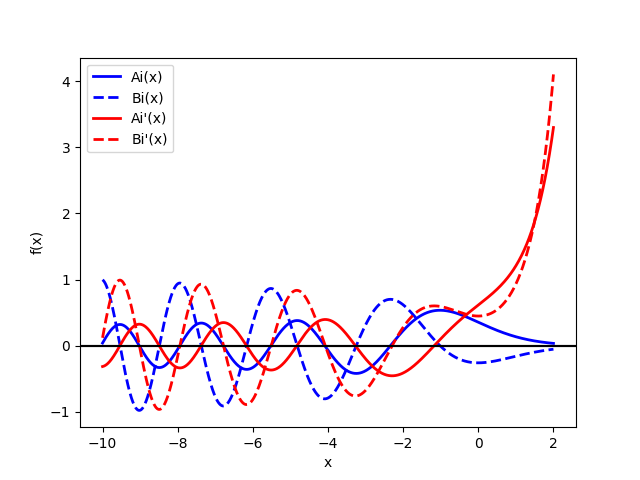

In [13]:
# plot function
x = np.linspace(-10,2,1001)
plt.plot(x, ai(x), 'b-', linewidth=2, label='Ai(x)')
plt.plot(x, bi(x), 'b--', linewidth=2, label='Bi(x)')
plt.axhline(y=0, xmin=0, xmax=1, color='k')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='upper right')
plt.show()

In [7]:
get_brackets(ai, -10, 0, 100)

sign change detected between -9.09090909091 and -8.9898989899
sign change detected between -7.9797979798 and -7.87878787879
sign change detected between -6.86868686869 and -6.76767676768
sign change detected between -5.55555555556 and -5.45454545455
sign change detected between -4.14141414141 and -4.0404040404
sign change detected between -2.42424242424 and -2.32323232323


array([[-9.09090909, -8.98989899],
       [-7.97979798, -7.87878788],
       [-6.86868687, -6.76767677],
       [-5.55555556, -5.45454545],
       [-4.14141414, -4.04040404],
       [-2.42424242, -2.32323232]])

In [14]:
get_brackets(bi, -10, 0, 100)

sign change detected between -9.595959595959595 and -9.494949494949495
sign change detected between -8.585858585858587 and -8.484848484848484
sign change detected between -7.373737373737374 and -7.272727272727273
sign change detected between -6.262626262626263 and -6.161616161616162
sign change detected between -4.848484848484849 and -4.747474747474747
sign change detected between -3.333333333333333 and -3.2323232323232327
sign change detected between -1.1111111111111107 and -1.0101010101010104


array([[-9.5959596 , -9.49494949],
       [-8.58585859, -8.48484848],
       [-7.37373737, -7.27272727],
       [-6.26262626, -6.16161616],
       [-4.84848485, -4.74747475],
       [-3.33333333, -3.23232323],
       [-1.11111111, -1.01010101]])

## Example: vanishing derivatives of Airy functions, Ai'(x) and Bi'(x)

In [15]:
# define function whose roots we are searching for
def aip(x):
    ai, bi, aip, bip = sp.airy(x)
    return aip # derivative of Airy function of the first kind, Ai'(x)

def bip(x):
    ai, bi, aip, bip = sp.airy(x)
    return bip # derivative of Airy function of the second kind, Bi'(x)

In [16]:
# plot function
x = np.linspace(-10,2,1001)
plt.plot(x, aip(x), 'r-', linewidth=2, label='Ai\'(x)')
plt.plot(x, bip(x), 'r--', linewidth=2,label='Bi\'(x)')
plt.axhline(y=0, xmin=0, xmax=1, color='k')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='upper left')
plt.show()

In [17]:
get_brackets(aip, -10, 0, 100)

sign change detected between -9.595959595959595 and -9.494949494949495
sign change detected between -8.585858585858587 and -8.484848484848484
sign change detected between -7.474747474747475 and -7.373737373737374
sign change detected between -6.262626262626263 and -6.161616161616162
sign change detected between -4.848484848484849 and -4.747474747474747
sign change detected between -3.333333333333333 and -3.2323232323232327
sign change detected between -1.2121212121212128 and -1.1111111111111107


array([[-9.5959596 , -9.49494949],
       [-8.58585859, -8.48484848],
       [-7.47474747, -7.37373737],
       [-6.26262626, -6.16161616],
       [-4.84848485, -4.74747475],
       [-3.33333333, -3.23232323],
       [-1.21212121, -1.11111111]])

In [18]:
get_brackets(bip, -10, 0, 100)

sign change detected between -9.090909090909092 and -8.98989898989899
sign change detected between -7.979797979797979 and -7.878787878787879
sign change detected between -6.8686868686868685 and -6.767676767676768
sign change detected between -5.555555555555555 and -5.454545454545455
sign change detected between -4.141414141414142 and -4.040404040404041
sign change detected between -2.3232323232323235 and -2.2222222222222223


array([[-9.09090909, -8.98989899],
       [-7.97979798, -7.87878788],
       [-6.86868687, -6.76767677],
       [-5.55555556, -5.45454545],
       [-4.14141414, -4.04040404],
       [-2.32323232, -2.22222222]])